In [2]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
adult = pd.read_csv('adult_dataset.csv')

In [4]:
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
adult.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
adult['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
adult['occupation'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Prof-specialty       12.7%
Craft-repair         12.6%
Exec-managerial      12.5%
Adm-clerical         11.6%
Sales                11.2%
Other-service        10.1%
Machine-op-inspct     6.1%
?                     5.7%
Transport-moving      4.9%
Handlers-cleaners     4.2%
Farming-fishing       3.1%
Tech-support          2.9%
Protective-serv       2.0%
Priv-house-serv       0.5%
Armed-Forces          0.0%
Name: occupation, dtype: object

In [11]:
adult['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
adult['workclass'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Private             69.7%
Self-emp-not-inc     7.8%
Local-gov            6.4%
?                    5.6%
State-gov            4.0%
Self-emp-inc         3.4%
Federal-gov          2.9%
Without-pay          0.0%
Never-worked         0.0%
Name: workclass, dtype: object

In [13]:
##adult['workclass'] = np.where(adult['workclass'] == '?' , adult['workclass'].mode(), adult['workclass'])

In [14]:
adult['workclass'].replace('?', 'Private',inplace=True)

In [15]:
adult['workclass'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Private             75.3%
Self-emp-not-inc     7.8%
Local-gov            6.4%
State-gov            4.0%
Self-emp-inc         3.4%
Federal-gov          2.9%
Without-pay          0.0%
Never-worked         0.0%
Name: workclass, dtype: object

In [16]:
adult['occupation'].replace('?', 'Prof-specialty',inplace=True)

In [17]:
adult['occupation'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Prof-specialty       18.4%
Craft-repair         12.6%
Exec-managerial      12.5%
Adm-clerical         11.6%
Sales                11.2%
Other-service        10.1%
Machine-op-inspct     6.1%
Transport-moving      4.9%
Handlers-cleaners     4.2%
Farming-fishing       3.1%
Tech-support          2.9%
Protective-serv       2.0%
Priv-house-serv       0.5%
Armed-Forces          0.0%
Name: occupation, dtype: object

In [18]:
adult['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

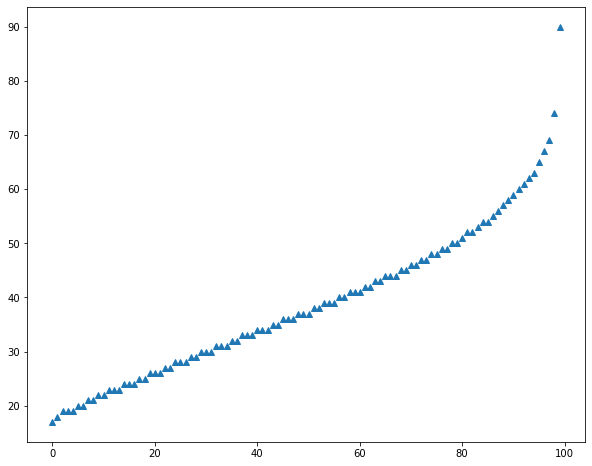

In [19]:

#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['age'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

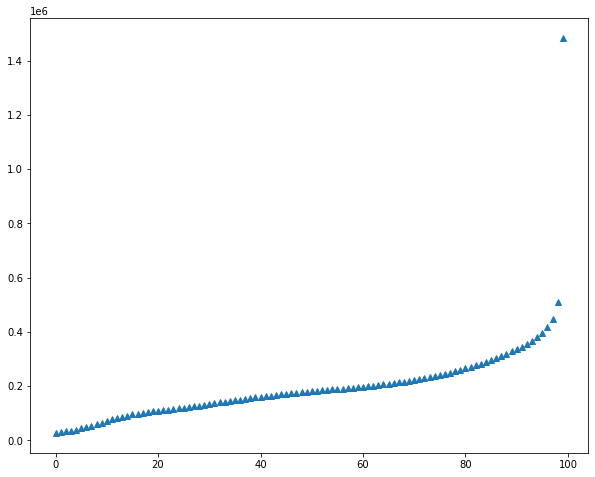

In [20]:
#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['fnlwgt'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

In [21]:
import seaborn as sns

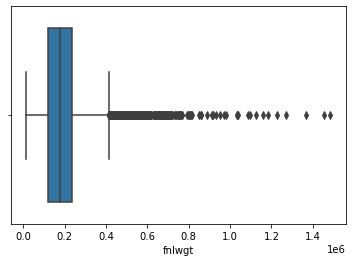

In [22]:
sns.boxplot(adult['fnlwgt'])
plt.show()

In [23]:
print(adult['fnlwgt'].skew())

1.4469800945789828


In [24]:
print(adult['fnlwgt'].quantile(0.95))

379682.0


In [25]:
adult['fnlwgt'] = np.where(adult['fnlwgt'] > 379682.0, 600000, adult['fnlwgt'])

In [26]:
print(adult['fnlwgt'].skew())

1.6375283699097019


In [27]:
adult['education'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

HS-grad         32.3%
Some-college    22.4%
Bachelors       16.4%
Masters          5.3%
Assoc-voc        4.2%
11th             3.6%
Assoc-acdm       3.3%
10th             2.9%
7th-8th          2.0%
Prof-school      1.8%
9th              1.6%
12th             1.3%
Doctorate        1.3%
5th-6th          1.0%
1st-4th          0.5%
Preschool        0.2%
Name: education, dtype: object

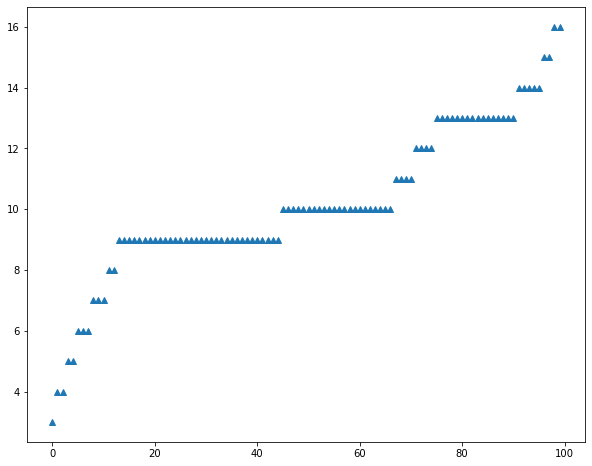

In [28]:
#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['education.num'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

In [29]:
adult['marital.status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Married-civ-spouse       46.0%
Never-married            32.8%
Divorced                 13.6%
Separated                 3.1%
Widowed                   3.0%
Married-spouse-absent     1.3%
Married-AF-spouse         0.1%
Name: marital.status, dtype: object

In [30]:
adult['occupation'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Prof-specialty       18.4%
Craft-repair         12.6%
Exec-managerial      12.5%
Adm-clerical         11.6%
Sales                11.2%
Other-service        10.1%
Machine-op-inspct     6.1%
Transport-moving      4.9%
Handlers-cleaners     4.2%
Farming-fishing       3.1%
Tech-support          2.9%
Protective-serv       2.0%
Priv-house-serv       0.5%
Armed-Forces          0.0%
Name: occupation, dtype: object

In [31]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
adult['relationship'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Husband           40.5%
Not-in-family     25.5%
Own-child         15.6%
Unmarried         10.6%
Wife               4.8%
Other-relative     3.0%
Name: relationship, dtype: object

In [33]:
adult['race'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

White                 85.4%
Black                  9.6%
Asian-Pac-Islander     3.2%
Amer-Indian-Eskimo     1.0%
Other                  0.8%
Name: race, dtype: object

In [34]:
adult['sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Male      66.9%
Female    33.1%
Name: sex, dtype: object

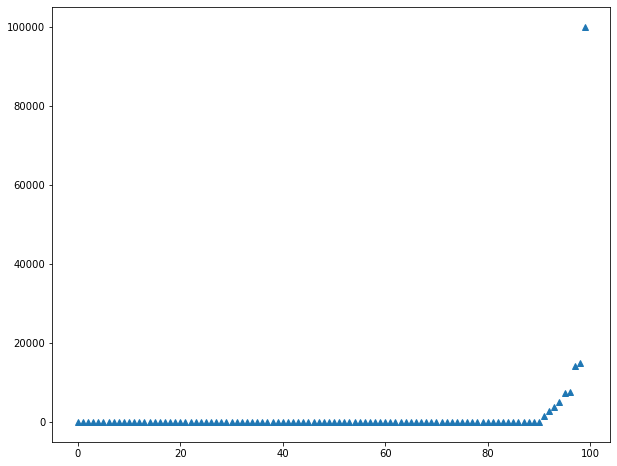

In [35]:
#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['capital.gain'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

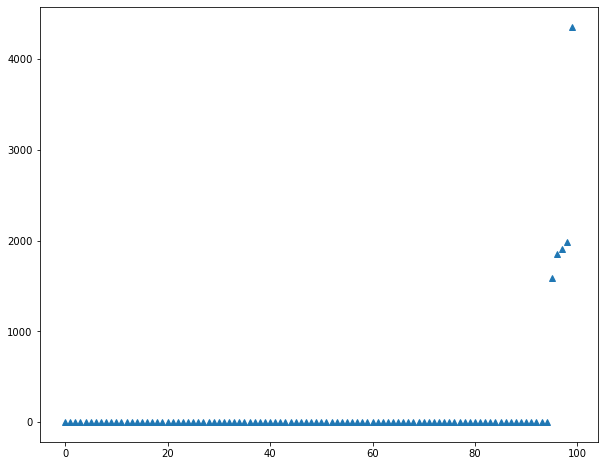

In [36]:
#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['capital.loss'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

In [37]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
adult['native.country'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

United-States                 89.6%
Mexico                         2.0%
?                              1.8%
Philippines                    0.6%
Germany                        0.4%
Canada                         0.4%
Puerto-Rico                    0.4%
El-Salvador                    0.3%
India                          0.3%
Cuba                           0.3%
England                        0.3%
Jamaica                        0.2%
South                          0.2%
China                          0.2%
Italy                          0.2%
Dominican-Republic             0.2%
Vietnam                        0.2%
Guatemala                      0.2%
Japan                          0.2%
Poland                         0.2%
Columbia                       0.2%
Taiwan                         0.2%
Haiti                          0.1%
Iran                           0.1%
Portugal                       0.1%
Nicaragua                      0.1%
Peru                           0.1%
Greece                      

In [39]:
adult['native.country'].replace('?', 'United-States',inplace=True)

In [40]:
adult['native.country'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

United-States                 91.4%
Mexico                         2.0%
Philippines                    0.6%
Germany                        0.4%
Canada                         0.4%
Puerto-Rico                    0.4%
El-Salvador                    0.3%
India                          0.3%
Cuba                           0.3%
England                        0.3%
Jamaica                        0.2%
South                          0.2%
China                          0.2%
Italy                          0.2%
Dominican-Republic             0.2%
Vietnam                        0.2%
Guatemala                      0.2%
Japan                          0.2%
Poland                         0.2%
Columbia                       0.2%
Taiwan                         0.2%
Haiti                          0.1%
Iran                           0.1%
Portugal                       0.1%
Nicaragua                      0.1%
Peru                           0.1%
Greece                         0.1%
France                      

In [41]:
adult['income'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

<=50K    75.9%
>50K     24.1%
Name: income, dtype: object

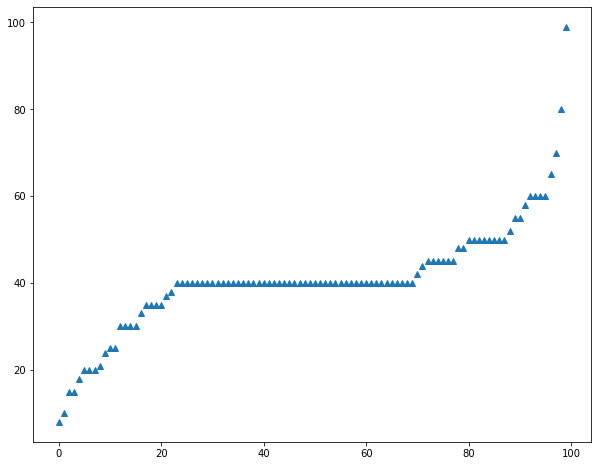

In [42]:
#check outliers in price

p=[ ]
for i in range(1,101):
    xyz = (adult['hours.per.week'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

In [43]:
import seaborn as sns

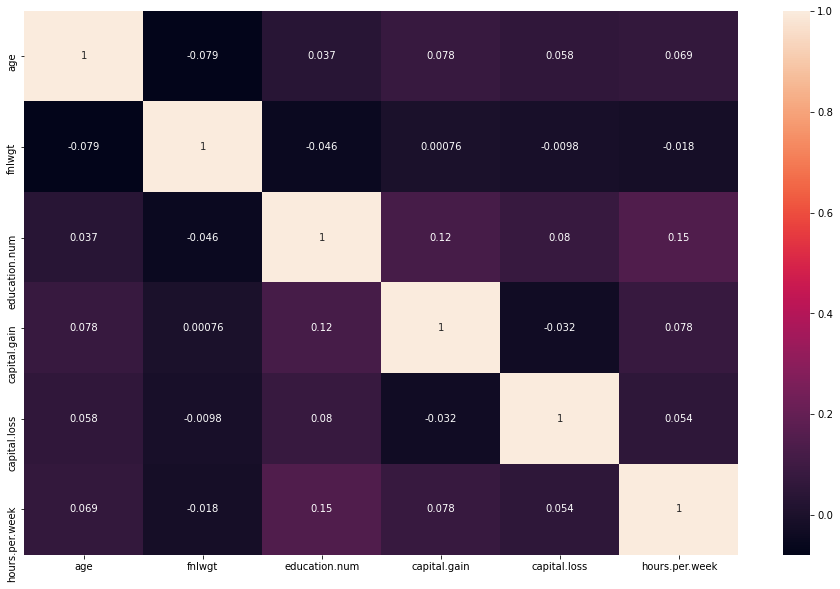

In [44]:
plt.figure(figsize = (16,10))
sns.heatmap(adult.corr(),annot = True)

In [45]:
# select all categorical variables
adult_categorical = adult.select_dtypes(include=['object'])
adult_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [46]:
# apply Label encoder to df_categorical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
adult_categorical = adult_categorical.apply(le.fit_transform)
adult_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,11,6,9,1,4,0,38,0
1,3,11,6,3,1,4,0,38,0
2,3,15,6,9,4,2,0,38,0
3,3,5,0,6,4,4,0,38,0
4,3,15,5,9,3,4,0,38,0


In [47]:
# concat df_categorical with original df
adult = adult.drop(adult_categorical.columns, axis=1)
adult = pd.concat([adult, adult_categorical], axis=1)
adult.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,90,77053,9,0,4356,40,3,11,6,9,1,4,0,38,0
1,82,132870,9,0,4356,18,3,11,6,3,1,4,0,38,0
2,66,186061,10,0,4356,40,3,15,6,9,4,2,0,38,0
3,54,140359,4,0,3900,40,3,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,3,15,5,9,3,4,0,38,0


In [48]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   capital.gain    32561 non-null  int64
 4   capital.loss    32561 non-null  int64
 5   hours.per.week  32561 non-null  int64
 6   workclass       32561 non-null  int32
 7   education       32561 non-null  int32
 8   marital.status  32561 non-null  int32
 9   occupation      32561 non-null  int32
 10  relationship    32561 non-null  int32
 11  race            32561 non-null  int32
 12  sex             32561 non-null  int32
 13  native.country  32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


# model building and evaluation

In [49]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [50]:
# Putting feature variable to X
x = adult.drop('income',axis=1)

In [51]:
# Putting response variable to y
y = adult['income']

In [52]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
x_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
5728,30,117963,13,0,0,40,3,9,2,0,0,4,1,38
10700,18,80564,9,0,0,60,3,11,4,9,3,4,1,38
29425,31,242984,10,0,0,40,3,15,5,5,1,4,1,38
2088,37,600000,13,15024,0,40,3,9,2,3,0,4,1,38
16292,40,170730,9,0,0,50,3,11,2,2,0,4,1,38


In [53]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
adult_default = DecisionTreeClassifier(max_depth=5)

In [54]:
adult_default.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [55]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = adult_default.predict(x_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7475
           1       0.76      0.50      0.60      2294

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [56]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7111  364]
 [1154 1140]]
0.8446105026102979


# descision tree plotting

In [57]:
# Importing required packages for visualization

In [58]:
conda install -c rmg pydot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [59]:
conda install pydot graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot

# Putting features
features = list(adult.columns[:14])
features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

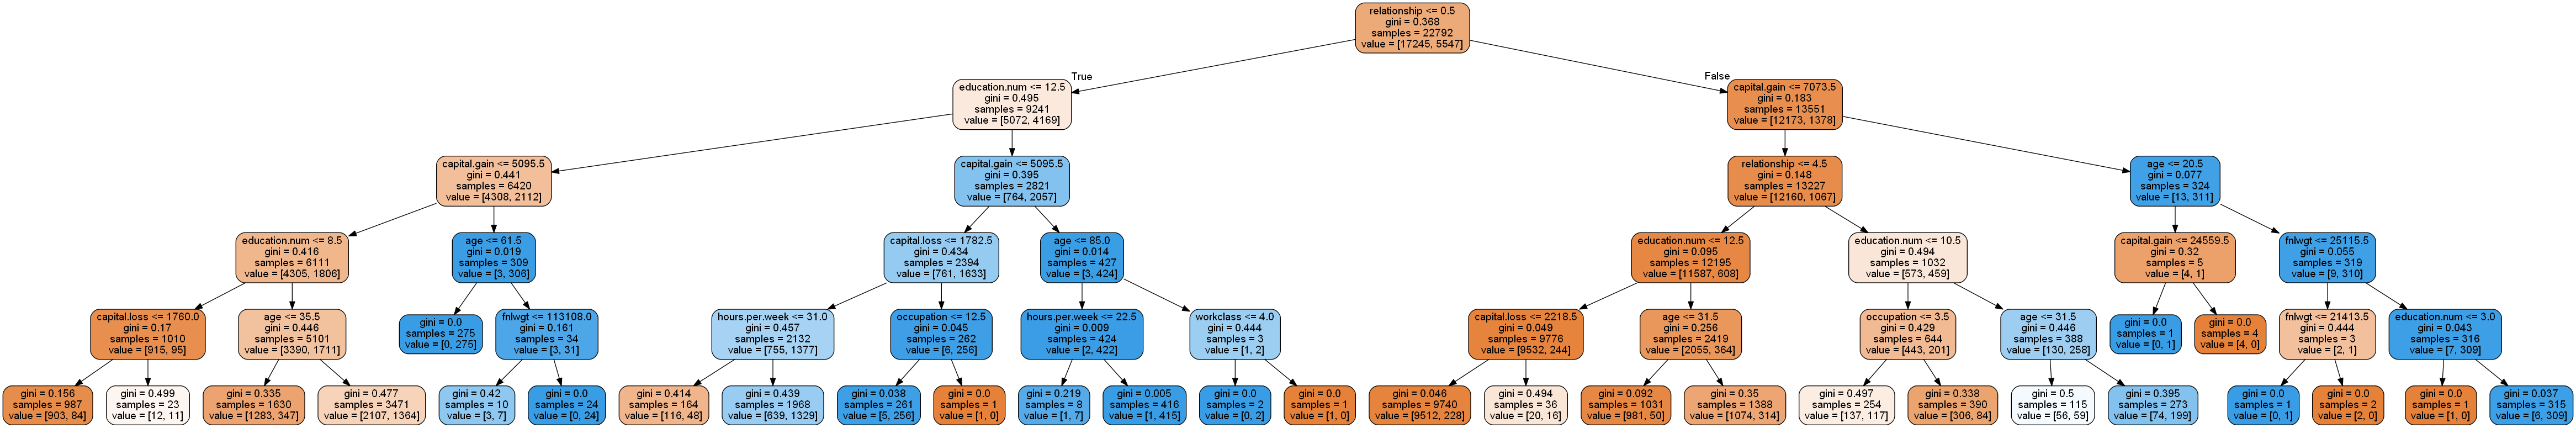

<Figure size 2880x2160 with 0 Axes>

In [66]:
dot_data = StringIO()  
export_graphviz(adult_default, out_file=dot_data,feature_names=features,filled=True,rounded=True)

plt.figure(figsize = (40,30))
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
rfc_pred = rfc.predict(x_test)

In [96]:
print(confusion_matrix(y_test,rfc_pred))

[[6960  515]
 [ 919 1375]]


In [97]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7475
           1       0.73      0.60      0.66      2294

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [98]:
## random forest model gives the better accuracy and f- score than descision tree

# hyperparameter tuning

In [99]:
# tuning max_depth

In [100]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
tree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(adult_default, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [101]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044480,0.014267,0.009974,0.001669,1,{'max_depth': 1},0.756526,0.756526,0.756692,0.756692,0.756692,0.756625,0.000081,39
1,0.034218,0.011518,0.006248,0.007652,2,{'max_depth': 2},0.832200,0.824523,0.819438,0.830189,0.825801,0.826430,0.004480,16
2,0.046596,0.003868,0.005714,0.005311,3,{'max_depth': 3},0.843825,0.838342,0.834796,0.843352,0.837867,0.839637,0.003452,12
3,0.037421,0.005571,0.005120,0.005419,4,{'max_depth': 4},0.852161,0.842509,0.842694,0.845766,0.845766,0.845779,0.003491,8
4,0.049080,0.000407,0.003194,0.000399,5,{'max_depth': 5},0.851283,0.845800,0.846424,0.853006,0.847521,0.848807,0.002833,6


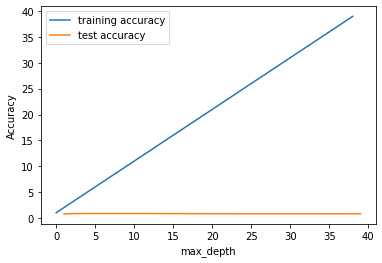

In [102]:

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [76]:
# min_samples_leaf

In [103]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
adult_default = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(adult_default, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [104]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113243,0.032257,0.007448,0.007027,5,{'min_samples_leaf': 5},0.829568,0.830884,0.823826,0.829311,0.817903,0.826298,0.004846,10
1,0.090602,0.006252,0.000000,0.000000,25,{'min_samples_leaf': 25},0.846019,0.852380,0.855638,0.846643,0.839184,0.847973,0.005675,9
2,0.099193,0.017660,0.004593,0.000794,45,{'min_samples_leaf': 45},0.852161,0.851283,0.857832,0.854103,0.848398,0.852755,0.003134,2
3,0.134235,0.032332,0.006783,0.002393,65,{'min_samples_leaf': 65},0.853038,0.852819,0.854980,0.847521,0.847082,0.851088,0.003185,6
4,0.077196,0.003827,0.003992,0.000003,85,{'min_samples_leaf': 85},0.851064,0.851283,0.854980,0.851031,0.844230,0.850518,0.003481,7


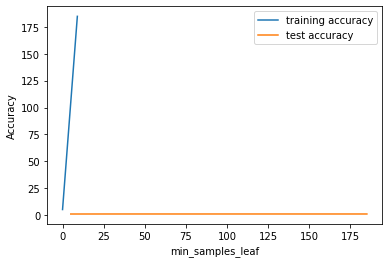

In [105]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
        
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning min_samples_split

In [106]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
adult_default= DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(adult_default, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [107]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.178343,0.064766,0.009831,0.006270,5,{'min_samples_split': 5},0.820575,0.819478,0.811321,0.813953,0.809346,0.814935,0.004421,10
1,0.115367,0.007291,0.000000,0.000000,25,{'min_samples_split': 25},0.836368,0.840535,0.838087,0.840939,0.829311,0.837048,0.004212,9
2,0.103782,0.013412,0.009374,0.007654,45,{'min_samples_split': 45},0.841632,0.845361,0.844888,0.849057,0.840061,0.844200,0.003135,8
3,0.107855,0.002989,0.000000,0.000000,65,{'min_samples_split': 65},0.842948,0.853696,0.851031,0.848398,0.840500,0.847315,0.004924,7
4,0.098591,0.009609,0.006249,0.007654,85,{'min_samples_split': 85},0.844922,0.853257,0.853664,0.852786,0.840061,0.848938,0.005490,6


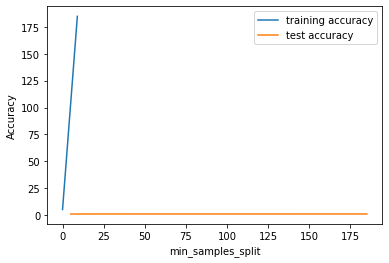

In [108]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Grid Search to Find Optimal Hyperparameters

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [110]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079511,0.011847,0.006382,0.002410,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.848179,0.847666,0.002607,15
1,0.066988,0.009099,0.001995,0.001669,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.848179,0.847666,0.002607,15
2,0.049987,0.006248,0.006256,0.007662,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.850373,0.848104,0.002831,13
3,0.067421,0.013568,0.002387,0.002052,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.852380,0.846458,0.846643,0.844669,0.850373,0.848104,0.002831,13
4,0.087717,0.007863,0.003126,0.006252,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856767,0.851064,0.851909,0.850812,0.847740,0.851658,0.002918,7
5,0.086520,0.008632,0.004327,0.006118,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856767,0.851064,0.851909,0.850812,0.847740,0.851658,0.002918,7
6,0.087028,0.011210,0.010172,0.006794,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856328,0.849967,0.851470,0.850154,0.851909,0.851965,0.002305,5
7,0.091057,0.011798,0.003922,0.006050,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856328,0.849967,0.851470,0.850154,0.851909,0.851965,0.002305,5
8,0.058472,0.006193,0.001789,0.002212,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851722,0.846458,0.846643,0.853225,0.848179,0.849245,0.002744,11
9,0.053018,0.007357,0.001588,0.001945,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.851722,0.846458,0.846643,0.853225,0.848179,0.849245,0.002744,11


In [111]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8529308820312222
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [112]:
# Running the model with best parameters obtained from grid search.

In [113]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [114]:
# accuracy score
clf_gini.score(x_test,y_test)

0.8511618384686253

In [115]:
## reduce the depth of thetree

In [116]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(x_train, y_train)

# score
print(clf_gini.score(x_test,y_test))

0.8400040945849114


In [117]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7475
           1       0.76      0.47      0.58      2294

    accuracy                           0.84      9769
   macro avg       0.81      0.71      0.74      9769
weighted avg       0.83      0.84      0.83      9769



In [118]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7136  339]
 [1224 1070]]
